In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [33]:
ticker_symbol = "BHEL.NS"  # Replace with your desired stock ticker
start_date = "2023-01-01"
end_date = "2024-01-01"

stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [34]:
print(stock_data.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-02  79.550003  81.650002  79.199997  80.150002  79.828918  18024909
2023-01-03  80.650002  81.250000  79.849998  80.349998  80.028114  14562959
2023-01-04  80.599998  80.599998  77.599998  79.199997  78.882721  19770399
2023-01-05  79.199997  82.150002  79.199997  81.949997  81.621704  32813046
2023-01-06  82.300003  83.500000  81.099998  81.750000  81.422508  25418809


In [35]:
# Example: Resample data to daily frequency
stock_data = stock_data['Close'].resample('D').ffill()

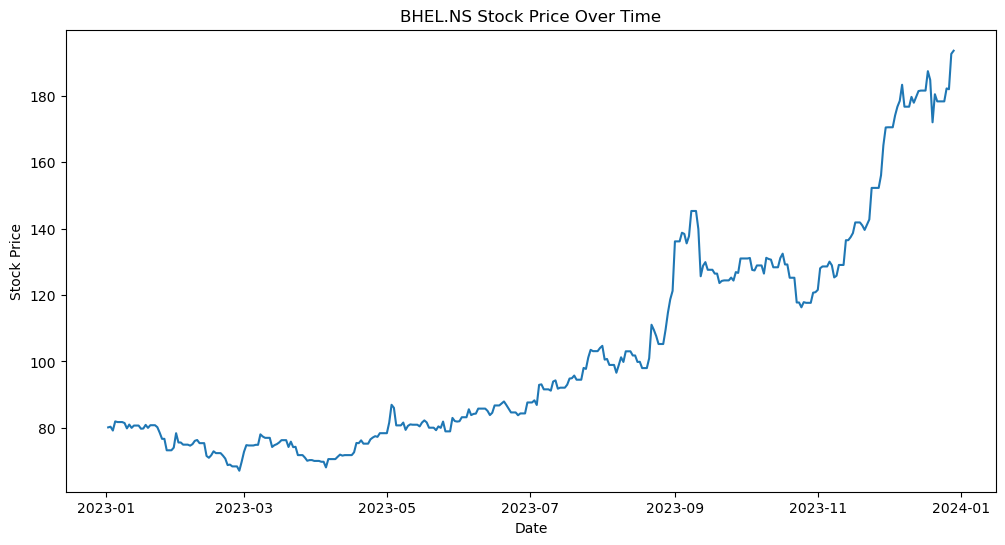

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data)
plt.title(f'{ticker_symbol} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [37]:
def ad_test(stock_data):
    dftest = adfuller(stock_data, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num of Observations Used For ADF Regression And Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t",key,": ",val)

In [38]:
stepwise_fit = auto_arima(stock_data, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1919.436, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1823.163, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1687.684, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1689.500, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1689.496, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.979 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  362
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -841.842
Date:                Wed, 24 Jan 2024   AIC                           1687.684
Time:                        23:42:30   BIC                           1695.456
Sample:                    01-02-2023   HQIC                          1690.774
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9859      0.008   -131.063      0.000      -1.001      -0.971
sigma2         6.2282      0.188     33.075      0.000       5.859       6.597
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              1635.93
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               7.51   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
print(stock_data.shape)
train = stock_data.iloc[:-30]
test = stock_data.iloc[-30:]
print(train.shape, test.shape)

(362,)
(332,) (30,)


In [40]:
model = ARIMA(train,order=(0,2,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  332
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -741.822
Date:                Wed, 24 Jan 2024   AIC                           1487.644
Time:                        23:42:43   BIC                           1495.242
Sample:                    01-02-2023   HQIC                          1490.675
                         - 11-29-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9855      0.008   -120.789      0.000      -1.001      -0.969
sigma2         5.1927      0.152     34.213      0.000       4.895       5.490
===================================================================================
Ljung-Box (L1) (Q):                   2.13   Jarque-Bera (JB):              2046.49
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               7.34   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
# PRedictions on Test Data
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start,end=end,type='levels')
print(pred)

2023-11-30    165.682691
2023-12-01    166.315380
2023-12-02    166.948068
2023-12-03    167.580756
2023-12-04    168.213444
2023-12-05    168.846133
2023-12-06    169.478821
2023-12-07    170.111509
2023-12-08    170.744198
2023-12-09    171.376886
2023-12-10    172.009574
2023-12-11    172.642262
2023-12-12    173.274951
2023-12-13    173.907639
2023-12-14    174.540327
2023-12-15    175.173016
2023-12-16    175.805704
2023-12-17    176.438392
2023-12-18    177.071080
2023-12-19    177.703769
2023-12-20    178.336457
2023-12-21    178.969145
2023-12-22    179.601833
2023-12-23    180.234522
2023-12-24    180.867210
2023-12-25    181.499898
2023-12-26    182.132587
2023-12-27    182.765275
2023-12-28    183.397963
2023-12-29    184.030651
Freq: D, Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

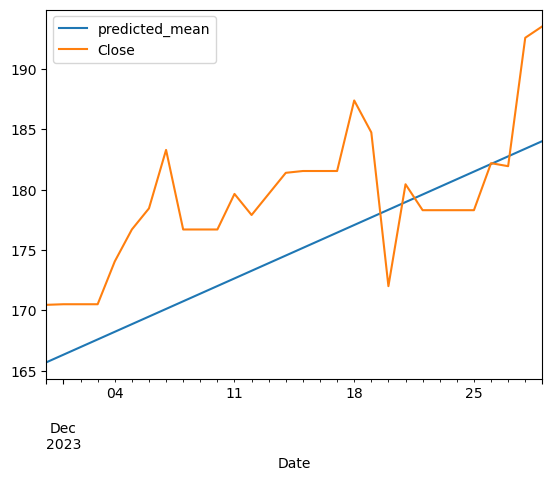

In [42]:
pred.plot(legend=True)
test.plot(legend=True)

In [43]:
test.mean()

179.19666595458983

In [44]:
rmse = sqrt(mean_squared_error(pred,test))
print(rmse)

6.1767908809595795
